In [139]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
import zipfile

zip1 = zipfile.ZipFile('C:/Users/erivarg/Documents/My Stuff/School/DSC530_Final/gl2019.zip')
df=pd.read_csv("gl2019.zip")
df.head()

,20190320,0,Wed,SEA,AL,1,OAK,AL.1,1.1,9,...,Jurickson Profar,4.3,semim001,Marcus Semien,6.4,hundn001,Nick Hundley,2.7,Unnamed: 159,Y
0,20190321,0,Thu,SEA,AL,2,OAK,AL,2,5,...,Jurickson Profar,4,laurr001,Ramon Laureano,8,phegj001,Josh Phegley,2,NaN,Y
1,20190328,0,Thu,PIT,NL,1,CIN,NL,1,3,...,Tucker Barnhart,2,iglej001,Jose Iglesias,6,castl003,Luis Castillo,1,NaN,Y
2,20190328,0,Thu,ARI,NL,1,LAN,NL,1,5,...,Enrique Hernandez,4,barna001,Austin Barnes,2,ryu-h001,Hyun-Jin Ryu,1,NaN,Y
3,20190328,0,Thu,COL,NL,1,MIA,NL,1,6,...,Miguel Rojas,6,herrr002,Rosell Herrera,7,urenj001,Jose Urena,1,NaN,Y
4,20190328,0,Thu,SLN,NL,1,MIL,NL,1,4,...,Yasmani Grandal,2,arcio002,Orlando Arcia,6,chacj001,Jhoulys Chacin,1,NaN,Y


In [142]:
import urllib

for year in range(2010, 2019):
    log_file = "GL" + str(year) + ".TXT"
    urllib.request.urlretrieve("https://meriatbackup.blob.core.windows.net/public/retrosheet/"+log_file, log_file)
    print(f'File {log_file} done...')

File GL2010.TXT done...
File GL2011.TXT done...
File GL2012.TXT done...
File GL2013.TXT done...
File GL2014.TXT done...
File GL2015.TXT done...
File GL2016.TXT done...
File GL2017.TXT done...
File GL2018.TXT done...


In [143]:
# Read games logs from the 2019 season into a dataframe

df = pd.read_csv("gl2019.zip", sep=",", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,20190320,0,Wed,SEA,AL,1,OAK,AL,1,9,...,Jurickson Profar,4,semim001,Marcus Semien,6,hundn001,Nick Hundley,2,NaN,Y
1,20190321,0,Thu,SEA,AL,2,OAK,AL,2,5,...,Jurickson Profar,4,laurr001,Ramon Laureano,8,phegj001,Josh Phegley,2,NaN,Y
2,20190328,0,Thu,PIT,NL,1,CIN,NL,1,3,...,Tucker Barnhart,2,iglej001,Jose Iglesias,6,castl003,Luis Castillo,1,NaN,Y
3,20190328,0,Thu,ARI,NL,1,LAN,NL,1,5,...,Enrique Hernandez,4,barna001,Austin Barnes,2,ryu-h001,Hyun-Jin Ryu,1,NaN,Y
4,20190328,0,Thu,COL,NL,1,MIA,NL,1,6,...,Miguel Rojas,6,herrr002,Rosell Herrera,7,urenj001,Jose Urena,1,NaN,Y


In [146]:
# Make readable by renaming columns of an input dataframe

def rename_cols(df):
    df.rename(columns = {3: 'Visiting Team', 6: 'Home Team', 9: 'Runs Visitor', 10: 'Runs Home'}, inplace=True)
    return df

# Invoke function to rename columns
df = rename_cols(df)

# Display
df.head()

,0,1,2,Visiting Team,4,5,Home Team,7,8,Runs Visitor,...,151,152,153,154,155,156,157,158,159,160
0,20190320,0,Wed,SEA,AL,1,OAK,AL,1,9,...,Jurickson Profar,4,semim001,Marcus Semien,6,hundn001,Nick Hundley,2,NaN,Y
1,20190321,0,Thu,SEA,AL,2,OAK,AL,2,5,...,Jurickson Profar,4,laurr001,Ramon Laureano,8,phegj001,Josh Phegley,2,NaN,Y
2,20190328,0,Thu,PIT,NL,1,CIN,NL,1,3,...,Tucker Barnhart,2,iglej001,Jose Iglesias,6,castl003,Luis Castillo,1,NaN,Y
3,20190328,0,Thu,ARI,NL,1,LAN,NL,1,5,...,Enrique Hernandez,4,barna001,Austin Barnes,2,ryu-h001,Hyun-Jin Ryu,1,NaN,Y
4,20190328,0,Thu,COL,NL,1,MIA,NL,1,6,...,Miguel Rojas,6,herrr002,Rosell Herrera,7,urenj001,Jose Urena,1,NaN,Y


In [147]:
# Method adds new columns to indicate whether home team or visiting team won the game
def add_new_cols(df):
    df['Home Win'] = (df['Runs Home'] > df['Runs Visitor'])
    df['Visitor Win'] = (df['Runs Visitor'] > df['Runs Home'])
    return df

# Invoke method to add new columns
df = add_new_cols(df)

# Display
df.head()

,0,1,2,Visiting Team,4,5,Home Team,7,8,Runs Visitor,...,153,154,155,156,157,158,159,160,Home Win,Visitor Win
0,20190320,0,Wed,SEA,AL,1,OAK,AL,1,9,...,semim001,Marcus Semien,6,hundn001,Nick Hundley,2,NaN,Y,False,True
1,20190321,0,Thu,SEA,AL,2,OAK,AL,2,5,...,laurr001,Ramon Laureano,8,phegj001,Josh Phegley,2,NaN,Y,False,True
2,20190328,0,Thu,PIT,NL,1,CIN,NL,1,3,...,iglej001,Jose Iglesias,6,castl003,Luis Castillo,1,NaN,Y,True,False
3,20190328,0,Thu,ARI,NL,1,LAN,NL,1,5,...,barna001,Austin Barnes,2,ryu-h001,Hyun-Jin Ryu,1,NaN,Y,True,False
4,20190328,0,Thu,COL,NL,1,MIA,NL,1,6,...,herrr002,Rosell Herrera,7,urenj001,Jose Urena,1,NaN,Y,False,True


In [148]:
# Method to group data by home team and compute relevant statistics
# Input type: dataframe
# Output type: dataframe (with stats grouped by home team)
def proc_home_team_data(df):

    # Group by home team
    home_group = df.groupby(df['Home Team'])

    # Compute stats: Number of games, runs scored, runs conceded, wins, run differential
    home_df = home_group[['Runs Visitor', 'Runs Home', 'Home Win']].apply(sum)
    home_df['Home Games'] = home_group['Home Win'].count()
    home_df.rename(columns = {'Runs Visitor': 'Runs by Visitor', 'Runs Home': 'Runs at Home', 'Home Win': 'Wins at Home'}, inplace=True)
    home_df['RD at Home'] = home_df['Runs at Home'] - home_df['Runs by Visitor']
    home_df.index.rename('Team', inplace=True)
    home_df.reset_index(inplace=True)

    return home_df

# Invoke method to group data by home team and compute statistics
home_df = proc_home_team_data(df)

# Display
df.head()

,0,1,2,Visiting Team,4,5,Home Team,7,8,Runs Visitor,...,153,154,155,156,157,158,159,160,Home Win,Visitor Win
0,20190320,0,Wed,SEA,AL,1,OAK,AL,1,9,...,semim001,Marcus Semien,6,hundn001,Nick Hundley,2,NaN,Y,False,True
1,20190321,0,Thu,SEA,AL,2,OAK,AL,2,5,...,laurr001,Ramon Laureano,8,phegj001,Josh Phegley,2,NaN,Y,False,True
2,20190328,0,Thu,PIT,NL,1,CIN,NL,1,3,...,iglej001,Jose Iglesias,6,castl003,Luis Castillo,1,NaN,Y,True,False
3,20190328,0,Thu,ARI,NL,1,LAN,NL,1,5,...,barna001,Austin Barnes,2,ryu-h001,Hyun-Jin Ryu,1,NaN,Y,True,False
4,20190328,0,Thu,COL,NL,1,MIA,NL,1,6,...,herrr002,Rosell Herrera,7,urenj001,Jose Urena,1,NaN,Y,False,True


In [82]:
# Method to group data by visiting team and compute relevant statistics
def proc_visiting_team_data(df):

    # Group by visiting team
    visit_group = df.groupby(df['Visiting Team'])

    # Compute stats: Number of games, runs scored, runs conceded, wins, run differential
    visit_df = visit_group[['Runs Visitor', 'Runs Home', 'Visitor Win']].apply(sum)
    visit_df['Road Games'] = visit_group['Visitor Win'].count()
    visit_df.rename(columns = {'Runs Visitor': 'Runs as Visitor', 'Runs Home': 'Runs by Home', 
                                 'Visitor Win': 'Wins as Visitor'}, inplace=True)
    visit_df['RD as Visitor'] = visit_df['Runs as Visitor'] - visit_df['Runs by Home']
    visit_df.index.rename('Team', inplace=True)
    visit_df.reset_index(inplace=True)

    return visit_df

# Invoke method to group data by visiting team and compute statistics
visit_df = proc_visiting_team_data(df)

# Display
visit_df.head()

,Team,Runs as Visitor,Runs by Home,Wins as Visitor,Road Games,RD as Visitor
0,ANA,378.0,433.0,34.0,81,-55.0
1,ARI,414.0,373.0,41.0,81,41.0
2,ATL,422.0,376.0,47.0,81,46.0
3,BAL,370.0,449.0,29.0,81,-79.0
4,BOS,449.0,389.0,46.0,81,60.0


In [149]:
# Method to merge dataframes with statistics grouped by home and visiting teams
# and compute explanatory and response variables

def merge_data_frames(home_df, visit_df):
    # Compute explanatory and response variables
    overall_df = home_df.merge(visit_df, how='outer', left_on='Team', right_on='Team')
    overall_df['RD'] = overall_df['RD at Home'] + overall_df['RD as Visitor']
    overall_df['Win Pct'] = (overall_df['Wins at Home'] + overall_df['Wins as Visitor']) / (overall_df['Home Games'] + overall_df['Road Games'])

    # Return dataframe with explanatory and response variables
    return overall_df

# Invoke method to merge home and visitor dataframes
overall_df = merge_data_frames(home_df, visit_df)

# Display
overall_df.head()

,Team,Runs by Visitor,Runs at Home,Wins at Home,Home Games,RD at Home,Runs as Visitor,Runs by Home,Wins as Visitor,Road Games,RD as Visitor,RD,Win Pct
0,ANA,435.0,391.0,38.0,81,-44.0,378.0,433.0,34.0,81,-55.0,-99.0,0.444444
1,ARI,370.0,399.0,44.0,81,29.0,414.0,373.0,41.0,81,41.0,70.0,0.524691
2,ATL,367.0,433.0,50.0,81,66.0,422.0,376.0,47.0,81,46.0,112.0,0.598765
3,BAL,532.0,359.0,25.0,81,-173.0,370.0,449.0,29.0,81,-79.0,-252.0,0.333333
4,BOS,439.0,452.0,38.0,81,13.0,449.0,389.0,46.0,81,60.0,73.0,0.518519


In [151]:
# Method to collate all data preprocessing steps
def extract_linear_reg_inputs(df):
    # Rename columns
    df = rename_cols(df)

    # Add new columns
    df = add_new_cols(df)

    # Group and process data by home team
    home_df = proc_home_team_data(df)

    # Group and process data by visiting team
    visit_df = proc_visiting_team_data(df)

    # Merge home and visitor dataframes
    overall_df = merge_data_frames(home_df, visit_df)

    return overall_df

In [153]:
# Get training data from 2010-2018 to train the linear regression model

# Initialize arrays to hold training data
train_run_diff = np.empty([0, 1])
train_win_pct = np.empty([0, 1])

# Loop
for year in range(2010, 2020):
    # Construct log file name
    log_file = "GL" + str(year) + ".TXT"
    print(log_file)
    # Read log into a dataframe
    df = pd.read_csv(log_file, sep=",", header=None)

    # Extract relevant stats into another dataframe
    df_proc = extract_linear_reg_inputs(df)

    # Add to training set
    train_run_diff = np.vstack([train_run_diff, df_proc['RD'].values.reshape([-1, 1])])
    train_win_pct = np.vstack([train_win_pct, df_proc['Win Pct'].values.reshape([-1, 1])])

GL2010.TXT
GL2011.TXT
GL2012.TXT
GL2013.TXT
GL2014.TXT
GL2015.TXT
GL2016.TXT
GL2017.TXT
GL2018.TXT
GL2019.TXT


In [154]:
# Instantiate an object
lin_regr = linear_model.LinearRegression(fit_intercept=True)

In [155]:
# Compute model parameters with training data
lin_regr.fit(train_run_diff, train_win_pct)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
# Access and display model parameters
print("Slope (a) = ", float(lin_regr.coef_), " Intercept (b) = ", float(lin_regr.intercept_))

Slope (a) =  0.0006077265875009796  Intercept (b) =  0.49996342744112515


In [157]:
# Get regression score (R-squared)
r_squared = lin_regr.score(train_run_diff, train_win_pct)
print("R-squared for linear fit = ", r_squared)

R-squared for linear fit =  0.8891311544013384


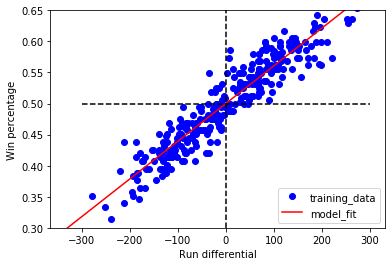

In [158]:
# Visualize
x_ax = np.array(range(int(np.min(train_run_diff)), int(np.max(train_run_diff)))).reshape(-1, 1)
y_ax = lin_regr.coef_ * x_ax + lin_regr.intercept_
plt.plot(train_run_diff, train_win_pct, 'bo', label="training_data")
plt.plot(x_ax, y_ax, 'r', label="model_fit")
plt.plot([-300, 300], [0.5, 0.5], "k--")
plt.plot([0, 0], [0.30, 0.65], "k--")
plt.ylim([0.30, 0.65])
plt.xlabel("Run differential")
plt.ylabel("Win percentage")
plt.legend(loc="lower right")
plt.show()

In [159]:
# Construct test dataset
log_file = "GL2019.TXT"
df = pd.read_csv(log_file, sep=",", header=None)
df_proc = extract_linear_reg_inputs(df)
test_run_diff = df_proc['RD'].values.reshape([-1, 1])
test_win_pct = df_proc['Win Pct'].values.reshape([-1, 1])

In [160]:
# Predict outcomes using regression model
predict_win_pct = lin_regr.predict(test_run_diff)

In [161]:
# Compute percentage error for linear regression model on test set
mean_abs_error_test = np.mean(np.abs(predict_win_pct - test_win_pct))
print("Percentage error on test set = ", 100. * mean_abs_error_test, "%")

# Compute percentage error for linear regression model on training set
model_fit_train = lin_regr.predict(train_run_diff)
mean_abs_error_training = np.mean(np.abs(model_fit_train - train_win_pct))
print("Percentage error on training set ", 100. * mean_abs_error_training, "%")

Percentage error on test set =  1.7380849888242396 %
Percentage error on training set  1.925846685228569 %


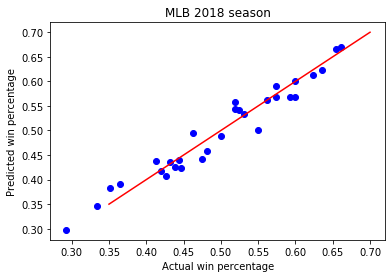

In [162]:
# Visualize
plt.plot(test_win_pct, predict_win_pct, 'bo')
plt.plot([0.35, 0.7], [0.35, 0.7], 'r')
plt.xlabel("Actual win percentage")
plt.ylabel("Predicted win percentage")
plt.title("MLB 2018 season")
plt.show()

In [164]:
# Get training data from 2011-2015 to train the logistic regression model

# Initialize arrays to hold training data
train_num_hits = np.empty([0, 1])
train_win_label = np.empty([0, 1])

# Loop
for year in range(2010, 2020):
    # Construct log file name
    log_file = "GL" + str(year) + ".TXT"

    # Read log into a dataframe
    df = pd.read_csv(log_file, sep=",", header=None)

    # Rename columns for readability
    df.rename(columns = {6: 'Home Team', 9: 'Runs Visitor', 10: 'Runs Home', 50: 'Hits Home'}, inplace=True)

    # Add new columns to indicate whether home team or visiting team won the game
    df['Home Win'] = (df['Runs Home'] > df['Runs Visitor'])

    # Add to training set
    train_num_hits = np.vstack([train_num_hits, df['Hits Home'].values.reshape([-1, 1])])
    train_win_label = np.vstack([train_win_label, df['Home Win'].values.reshape([-1, 1])])

In [165]:
# Instantiate logistic regression object
log_regr = linear_model.LogisticRegression()

In [166]:
# Fit model to training data
log_regr.fit(train_num_hits, train_win_label.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
print("Slope = ", float(log_regr.coef_), " Intercept = ", float(log_regr.intercept_))

Slope =  0.2537096896023032  Intercept =  -1.9987963306374512


In [168]:
# Estimate the probability of home team winning the game as a function of number
# of hits from the training data
hits_range = np.arange(np.min(train_num_hits), np.max(train_num_hits))
prob_est_train_data = np.zeros([len(hits_range), 1])
for hits in hits_range:
    index = np.where(train_num_hits == hits)
    if len(index[0]) > 0:
        prob_est_train_data[int(hits - np.min(train_num_hits))] = np.sum(train_win_label[index[0]]) / len(index[0])

In [169]:
# Get the probabilities as estimated by the model
prob_est_model = log_regr.predict_proba(train_num_hits)

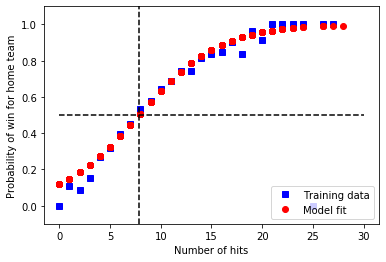

In [170]:
# Plot and visualize input and estimated probabilities
plt.plot(hits_range, prob_est_train_data, 'bs', label="Training data")
plt.plot(train_num_hits, prob_est_model[:, 1], 'ro', label="Model fit")
plt.plot([0, 30], [0.5, 0.5], "k--")
plt.plot([7.89, 7.89], [-0.1, 1.1], "k--")
plt.ylim([-0.1, 1.1])
plt.legend(loc="lower right")
plt.xlabel("Number of hits")
plt.ylabel("Probability of win for home team")
plt.show()

In [171]:
# Evaluate model
log_file = "GL2019.TXT"
df = pd.read_csv(log_file, sep=",", header=None)

In [172]:
# Rename columns for readability
df.rename(columns = {6: 'Home Team', 9: 'Runs Visitor', 10: 'Runs Home', 50: 'Hits Home'}, inplace=True)

In [173]:
# Add new columns to indicate whether home team or visiting team won the game
df['Home Win'] = (df['Runs Home'] > df['Runs Visitor'])

# Construct test data
test_num_hits = df['Hits Home'].values.reshape([-1, 1])
test_win_label = df['Home Win'].values.reshape([-1, 1])

In [174]:
# Prediction
predict_win_label = log_regr.predict(test_num_hits)

In [175]:
# Get score
log_regr_score_test = log_regr.score(test_num_hits, test_win_label.ravel())
print("Percentage correct on test set = ", 100. * log_regr_score_test, "%")

Percentage correct on test set =  64.51214491560313 %


In [176]:
# Evaluate performance for each value of X
delta = np.abs(test_win_label.ravel() - predict_win_label.ravel())
hits_range = np.arange(np.min(test_num_hits), np.max(test_num_hits))
frac_correct = np.zeros([len(hits_range), 1])
for hits in hits_range:
    index_all = np.where(test_num_hits == hits)
    index_correct = np.where((test_num_hits.ravel() == hits) & (delta.ravel() == 0))
    frac_correct[int(hits - np.min(test_num_hits))] = len(index_correct[0]) / len(index_all[0])

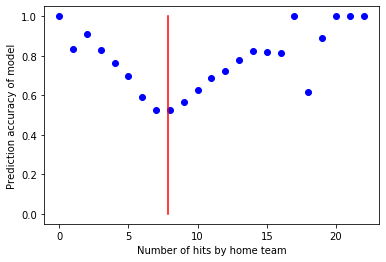

In [177]:
# Visualize frac_correct.
# Plot
plt.plot(hits_range, frac_correct,'bo')
plt.xlabel("Number of hits by home team")
plt.ylabel("Prediction accuracy of model")
mid_point = -1. * float(log_regr.intercept_) / float(log_regr.coef_) 
plt.plot([mid_point, mid_point], [0, 1], 'r')
plt.show()